In [1]:
from layers.Dense_network import Dense
# from layers.Rough_network import Rough
# from layers.RBF_network import RBF
from losses.MeanSquaredError import MSE
from losses.CategoricalCrossEntropy import Entropy
from utils import sliding_window, plot_curve_fitting, plot_regression
from compile import compile
import numpy as np
from utils import one_hot_encoder, plot_confusion_matrix, visualize2D_data
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from layers.Flexible_Dense import flexible_Dense

In [2]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [3]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 4)
X = data[:, :-1]
Y = data[:,-1]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5, shuffle=False)

In [4]:
layer0 = Dense(input_size=3, output_size=5)
layer2 = Dense(input_size=5, output_size=1, activation='linear')
model = compile([layer0, layer2])
params = model.trainable_params()
print(f'number of model trainable parameters is {params}')

number of model trainable parameters is 26


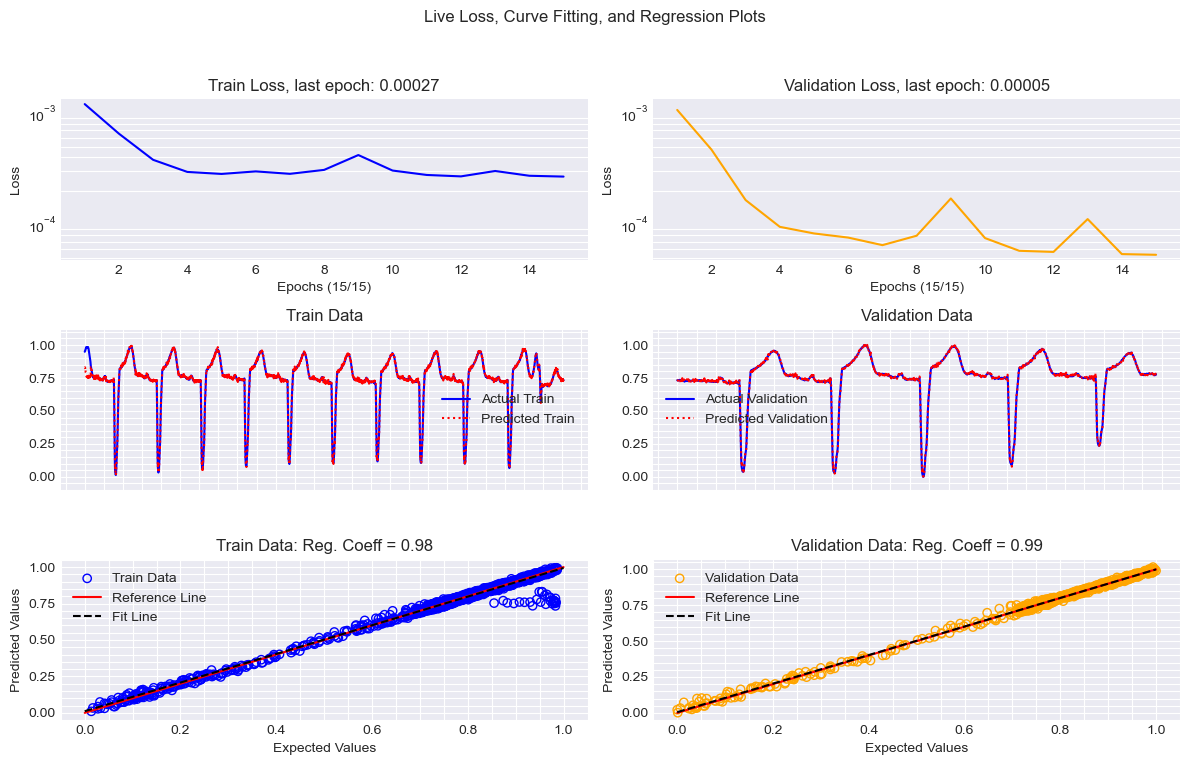

In [5]:
history = model.fit(X_train, X_val, Y_train.reshape(-1,1), Y_val.reshape(-1,1), MSE, epoch=15,
                    learning_rate=1e-2, bias_learning_rate=2e-3, shuffle=True,
                    plot_reg=True, plot_fitting=True)

Test MSE is 0.03273


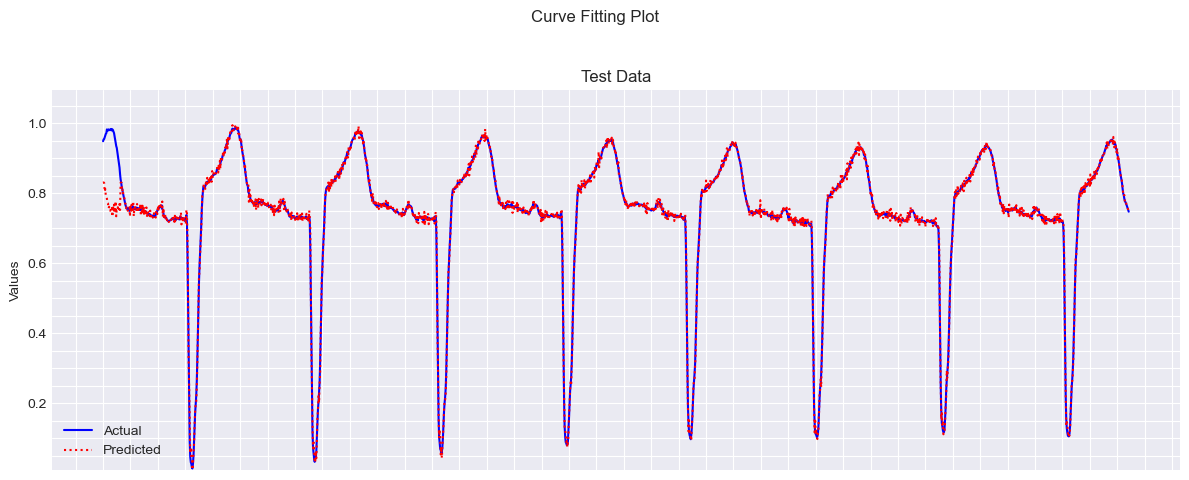

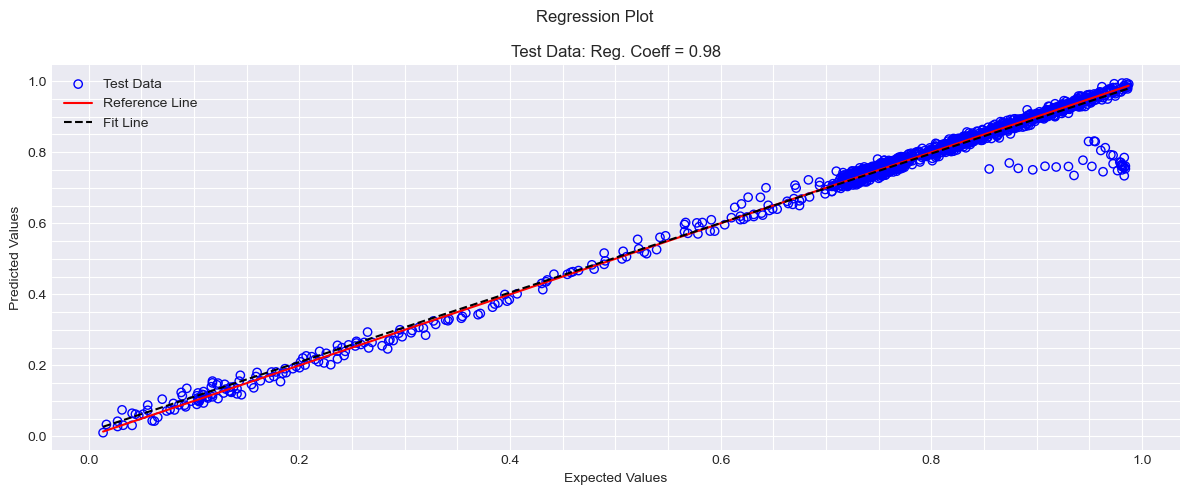

In [8]:
Y_test_predicted = model(X_test)
mse = MSE.forward(Y_test_predicted, Y_test)
print(f'Test MSE is {mse:.5f}')
plot_curve_fitting(Y_test, Y_test_predicted)
plot_regression(Y_test, Y_test_predicted)

In [15]:
path = 'data\\iris.csv'
data=pd.read_csv(path, header=None).to_numpy()[1:]

In [60]:
X = data[:, :-1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y, labels = one_hot_encoder(data[:, -1])
# Initialize StratifiedShuffleSplit to maintain class distribution across splits
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Stratified split for train and validation sets
for train_idx, val_idx in strat_split.split(X, data[:, -1]):  # Pass class labels as stratification criterion
    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]
# Split validation set further into validation and test using stratified sampling again
strat_split_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in strat_split_test.split(X_val, data[val_idx, -1]):
    X_val, X_test = X_val[val_idx], X_val[test_idx]
    Y_val, Y_test = Y_val[val_idx], Y_val[test_idx]
# Now X_train, X_val, X_test, Y_train, Y_val, Y_test are class-wise split, 
# with consistent representation of each class in all datasets.

In [91]:
layer0 = Dense(input_size=4, output_size=18, activation='tanh', weights_init_method='xavier')
layer1 = Dense(input_size=18, output_size=9, activation='tanh', weights_init_method='xavier')
layer2 = Dense(input_size=9, output_size=3, activation='softmax')
model = compile([layer0, layer1, layer2])
params = model.trainable_params()
print(f'number of model trainable parameters is {params}')

number of model trainable parameters is 291


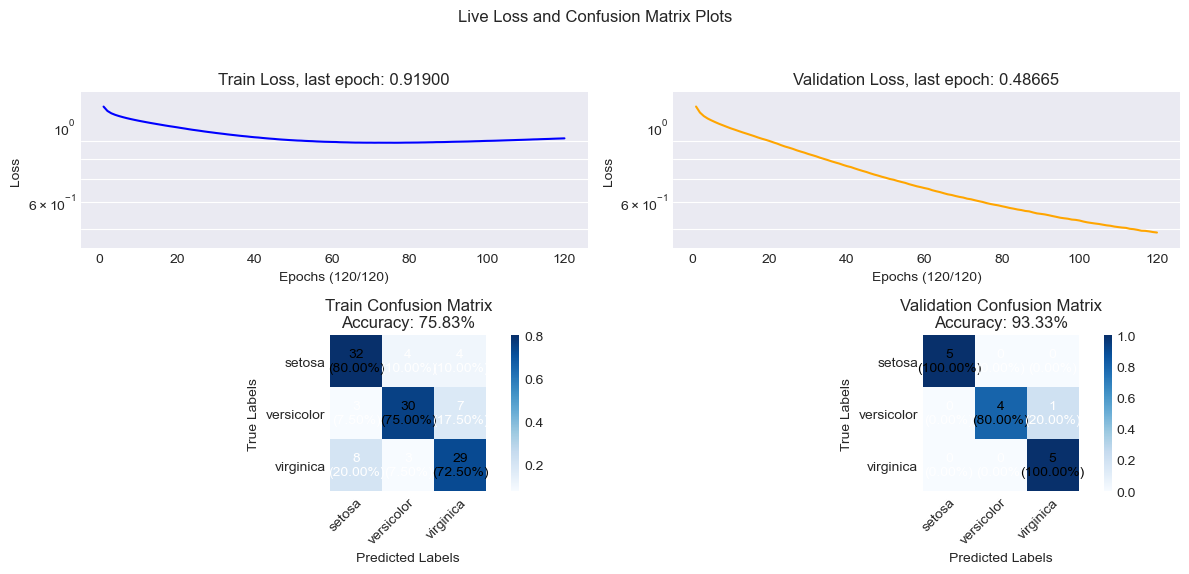

In [92]:
history = model.fit(X_train, X_val, Y_train, Y_val, Entropy, epoch=120,
                    shuffle=True, learning_rate=1.5e-2, bias_learning_rate=8e-3,
                    classes=labels, plot_confusion=True, method='GD')

Test Entropy is 0.50805


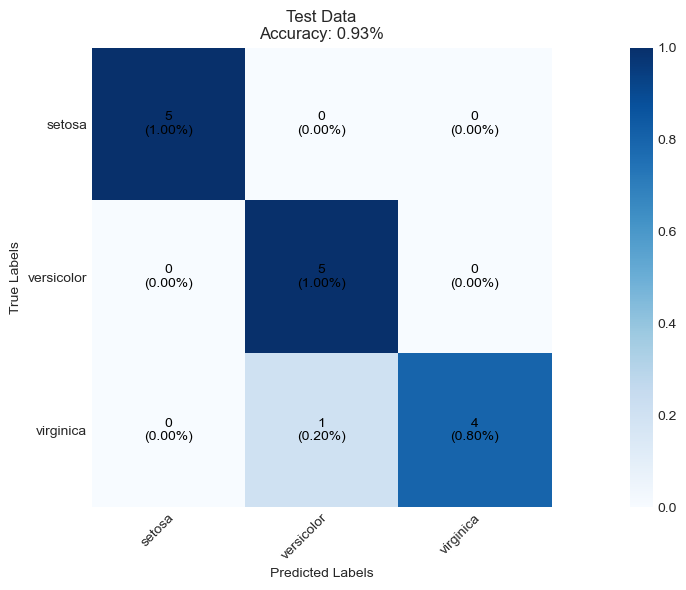

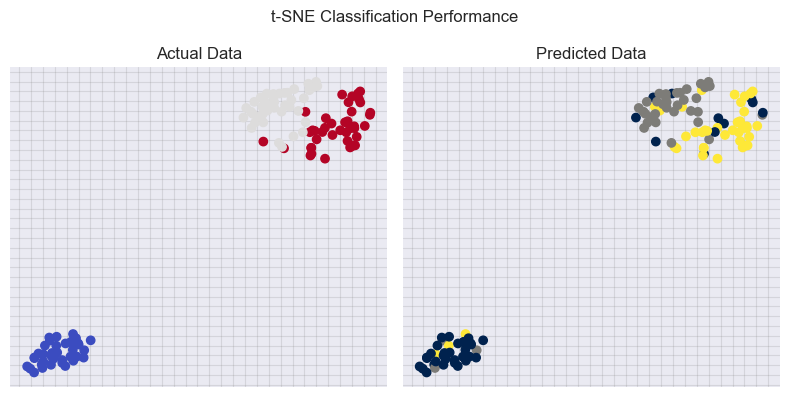

In [94]:
Y_test_predicted = model(X_test)
entropy = Entropy.forward(Y_test_predicted, Y_test)
print(f'Test Entropy is {entropy:.5f}')
plot_confusion_matrix(Y_test, Y_test_predicted, labels)
visualize2D_data(X_train, Y_train, model(X_train))

In [6]:
layer0 = flexible_Dense(input_size=3, output_size=5, activation='elu')
layer2 = Dense(input_size=5, output_size=1, activation='linear')
model = compile([layer0, layer2])
params = model.trainable_params()
print(f'number of model trainable parameters is {params}')

number of model trainable parameters is 36


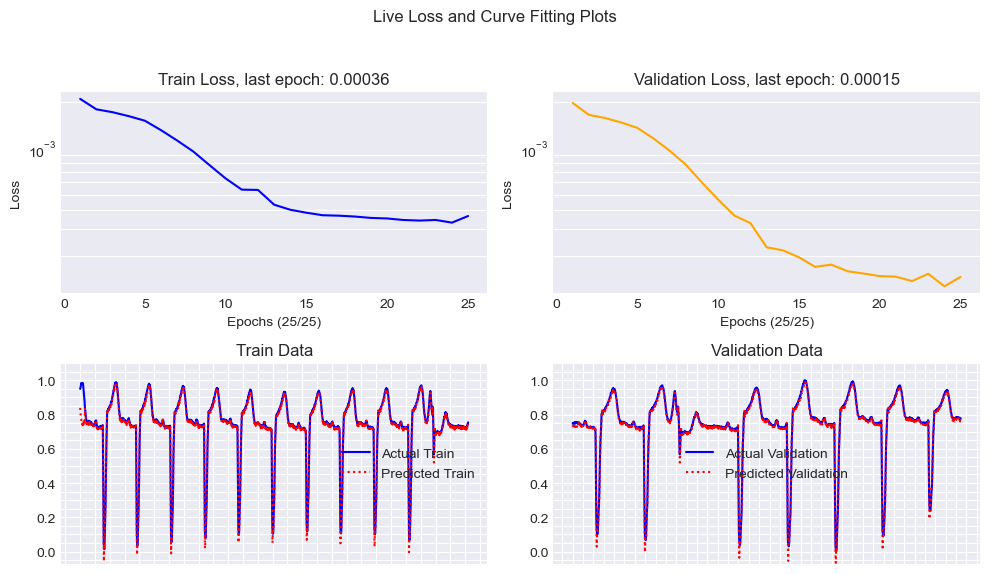

In [7]:
history = model.fit(X_train, X_val, Y_train.reshape(-1,1), Y_val.reshape(-1,1), MSE, epoch=25,
                    learning_rate=5e-3, bias_learning_rate=1e-3, shuffle=True, plot_fitting=True)